In [1]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivos CSV de México
venecia_private_room = pd.read_csv("venecia_private_room.csv")

In [3]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_private_room['price'] = venecia_private_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_16892\2356836233.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_private_room['price'] = venecia_private_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "name", "description", "neighborhood_overview", "host_name", "host_since",
  "host_location", "host_response_rate", "neighbourhood",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
   "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic","calendar_last_scraped"
]

# Eliminar columnas del DataFrame
mexico_private_room = mexico_private_room.drop(columns=columnas_a_eliminar)

KeyError: "['room_type'] not found in axis"

In [6]:
venecia_private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1701 non-null   float64
 1   host_id                                       1701 non-null   int64  
 2   host_acceptance_rate                          1701 non-null   float64
 3   host_is_superhost                             1701 non-null   int64  
 4   host_listings_count                           1701 non-null   int64  
 5   host_total_listings_count                     1701 non-null   int64  
 6   host_identity_verified                        1701 non-null   int64  
 7   property_type                                 1701 non-null   object 
 8   room_type                                     1701 non-null   object 
 9   accommodates                                  1701 non-null   i

In [ ]:
#venecia_private_room.to_csv("venecia_private_room1.csv")

In [8]:
venecia_private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1701 non-null   float64
 1   host_id                                       1701 non-null   int64  
 2   host_acceptance_rate                          1701 non-null   float64
 3   host_is_superhost                             1701 non-null   int64  
 4   host_listings_count                           1701 non-null   int64  
 5   host_total_listings_count                     1701 non-null   int64  
 6   host_identity_verified                        1701 non-null   int64  
 7   property_type                                 1701 non-null   object 
 8   room_type                                     1701 non-null   object 
 9   accommodates                                  1701 non-null   i

mexico_entire_home     
PRICE Vs host_acceptance_rate

In [9]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room[['host_acceptance_rate']]
Vars_Dep=venecia_private_room['price']

In [10]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [12]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [13]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.54237004]),
 'rank_': 1,
 'singular_': array([887.96345344]),
 'intercept_': 209.40047133732065}

Modelo matemático:y=0.54237004 *209.40047133732065

In [14]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0004894938872709309

In [15]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room[['host_acceptance_rate']])
y_pred

array([263.6374751 , 263.6374751 , 262.01036498, ..., 263.6374751 ,
       209.40047134, 263.6374751 ])

In [22]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room.insert(0, 'Predicciones', y_pred)
venecia_private_room

ValueError: cannot insert Predicciones, already exists

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

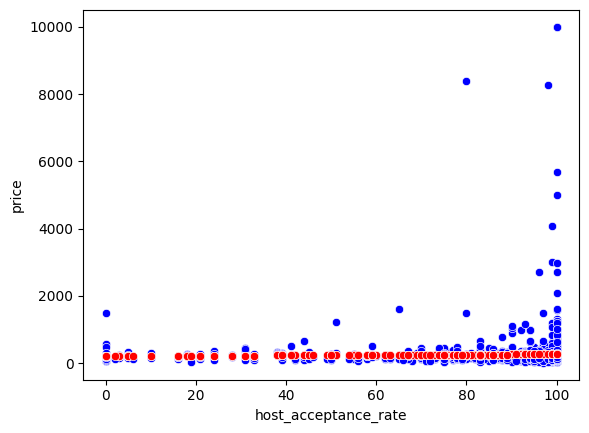

In [17]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=venecia_private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=venecia_private_room)

In [18]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0004894938872709309

In [19]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.022124508746431657

In [81]:
#sns.pairplot(mexico_entire_home)

In [21]:
venecia_private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  1701 non-null   float64
 1   id                                            1701 non-null   float64
 2   host_id                                       1701 non-null   int64  
 3   host_acceptance_rate                          1701 non-null   float64
 4   host_is_superhost                             1701 non-null   int64  
 5   host_listings_count                           1701 non-null   int64  
 6   host_total_listings_count                     1701 non-null   int64  
 7   host_identity_verified                        1701 non-null   int64  
 8   property_type                                 1701 non-null   object 
 9   room_type                                     1701 non-null   o

In [24]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room = venecia_private_room.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

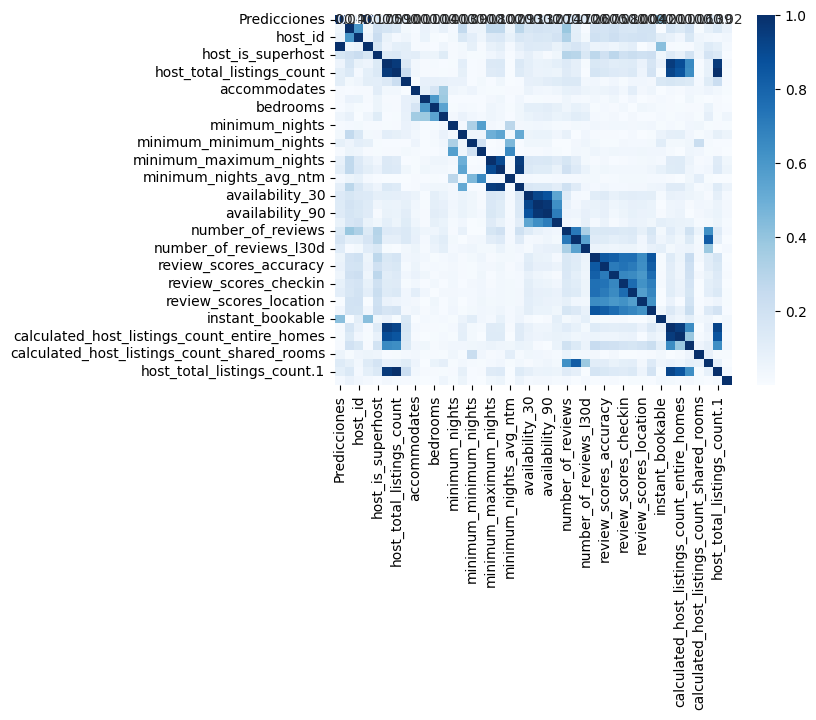

In [27]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [28]:
venecia_private_room1 = pd.read_csv("venecia_private_room1.csv")

In [29]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=venecia_private_room1[['host_is_superhost']]
Vars_Dep=venecia_private_room1['price']

In [30]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([6.52851427]),
 'rank_': 1,
 'singular_': array([18.29431474]),
 'intercept_': 256.8688656476267}

Modelo matemático:y=6.52851427 * 256.8688656476267

In [31]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

3.010417419124778e-05

In [33]:
venecia_private_room1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1701 non-null   int64  
 1   id                                            1701 non-null   float64
 2   host_id                                       1701 non-null   int64  
 3   host_acceptance_rate                          1701 non-null   float64
 4   host_is_superhost                             1701 non-null   int64  
 5   host_listings_count                           1701 non-null   int64  
 6   host_total_listings_count                     1701 non-null   int64  
 7   host_identity_verified                        1701 non-null   int64  
 8   property_type                                 1701 non-null   object 
 9   room_type                                     1701 non-null   o

In [34]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room1[['host_is_superhost']])
y_pred

array([256.86886565, 263.39737991, 256.86886565, ..., 256.86886565,
       256.86886565, 256.86886565])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room1.insert(0, 'Predicciones', y_pred)
venecia_private_room1

<Axes: xlabel='host_is_superhost', ylabel='price'>

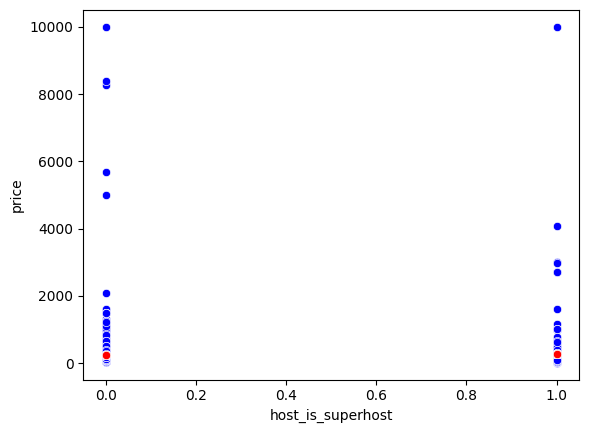

In [36]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=venecia_private_room1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=venecia_private_room1)

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

3.010417419124778e-05

In [38]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.005486727092834833

In [40]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room1 = venecia_private_room1.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room1.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

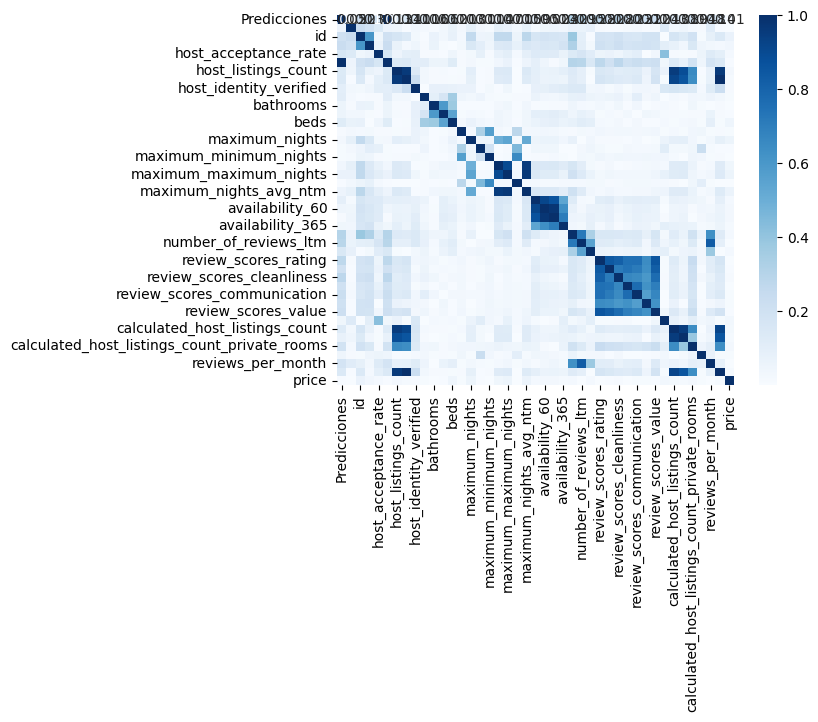

In [43]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [44]:
venecia_private_room2 = pd.read_csv("venecia_private_room1.csv")

In [45]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room2[['bathrooms']]
Vars_Dep=venecia_private_room2['accommodates']

In [46]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.13263427]),
 'rank_': 1,
 'singular_': array([31.88972309]),
 'intercept_': 2.235900787327381}

Modelo matemático:y=0.13263427 * 2.235900787327381

In [47]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00900151936740401

In [48]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room2[['bathrooms']])
y_pred

array([2.36853506, 2.36853506, 2.50116933, ..., 2.36853506, 2.36853506,
       2.50116933])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room2.insert(0, 'Predicciones', y_pred)
venecia_private_room2


<Axes: xlabel='bathrooms', ylabel='accommodates'>

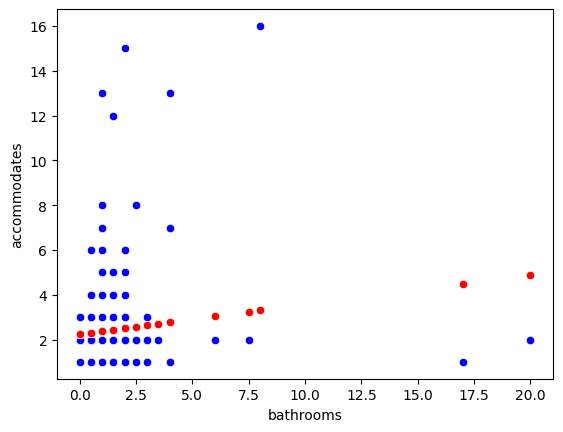

In [50]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=venecia_private_room2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=venecia_private_room2)


In [51]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00900151936740401

In [52]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.09487633723644695

In [54]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room2 = venecia_private_room2.drop(columns=columnas_a_eliminar)

In [ ]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room2.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


<Axes: >

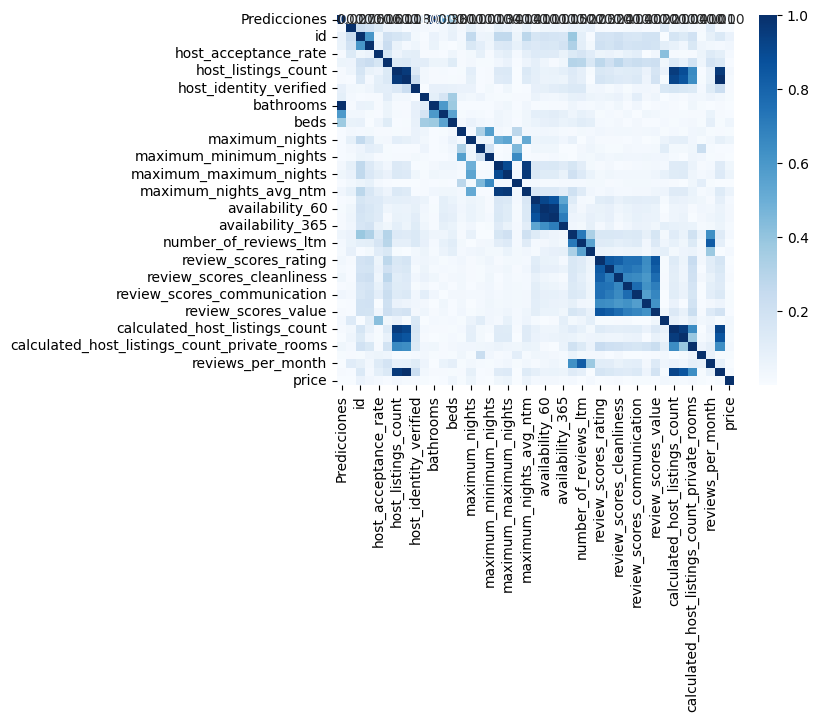

In [57]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [58]:
venecia_private_room3 = pd.read_csv("venecia_private_room1.csv")

In [59]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room3[['review_scores_cleanliness']]
Vars_Dep=venecia_private_room3['price']


In [60]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.60051937]),
 'rank_': 1,
 'singular_': array([19.13338756]),
 'intercept_': 326.7581554923592}

Modelo matemático:y=-14.60051937 *326.7581554923592

In [61]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00016469713985423073

In [62]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room3[['review_scores_cleanliness']])
y_pred

array([255.79963136, 255.79963136, 279.30646754, ..., 253.75555865,
       253.75555865, 253.75555865])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room3.insert(0, 'Predicciones', y_pred)
venecia_private_room3

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

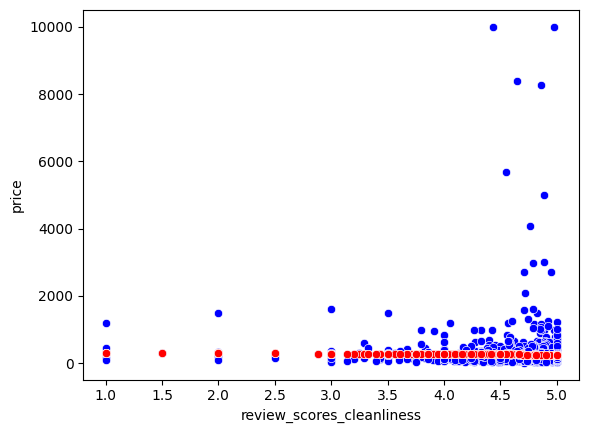

In [64]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=venecia_private_room3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=venecia_private_room3)

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00016469713985423073

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.01283343834886936

In [68]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room3 = venecia_private_room3.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

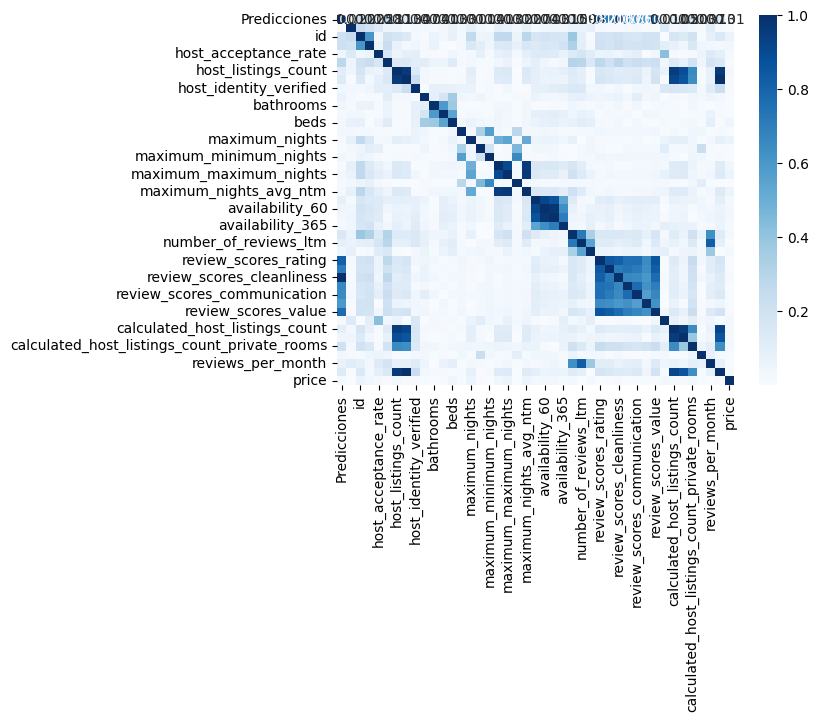

In [71]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [73]:
venecia_private_room4 = pd.read_csv("venecia_private_room1.csv")

In [74]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room4[['host_identity_verified']]
Vars_Dep=venecia_private_room4['price']


In [75]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([28.86445404]),
 'rank_': 1,
 'singular_': array([11.55285886]),
 'intercept_': 232.23972602739744}

Modelo matemático:y=28.86445404 * 232.23972602739744


In [76]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


0.00023467743927008122

In [77]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room4[['host_identity_verified']])
y_pred


array([232.23972603, 261.10418006, 232.23972603, ..., 261.10418006,
       232.23972603, 261.10418006])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room4.insert(0, 'Predicciones', y_pred)
venecia_private_room4


<Axes: xlabel='host_identity_verified', ylabel='price'>

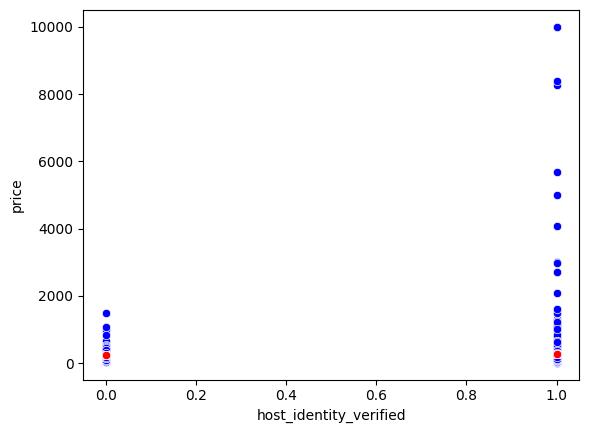

In [79]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=venecia_private_room4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=venecia_private_room4)


In [80]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00023467743927008122

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.01531918533310702

In [83]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room4 = venecia_private_room4.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room4.corr()
Corr_Factors


In [31]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
Predicciones,1.000000,0.102577,0.096626,0.045334,0.008263,0.002860,0.011444,0.024609,0.011703,0.004009,...,0.004041,0.016893,0.006670,0.002528,0.003456,0.011487,0.028024,1.000000,0.097467,0.003605
Unnamed: 0,0.102577,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.102577,0.223907,0.010531
id,0.096626,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.096626,0.202706,0.011514
host_id,0.045334,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.045334,0.108508,0.085795
host_acceptance_rate,0.008263,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.008263,0.000970,0.248486
price,0.002860,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.002860,0.013786,0.020353
latitude,0.011444,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.011444,0.020800,0.026725
longitude,0.024609,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.024609,0.000595,0.006967
accommodates,0.011703,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.011703,0.027081,0.004356
bathrooms,0.004009,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.004009,0.010986,0.089928


<Axes: >

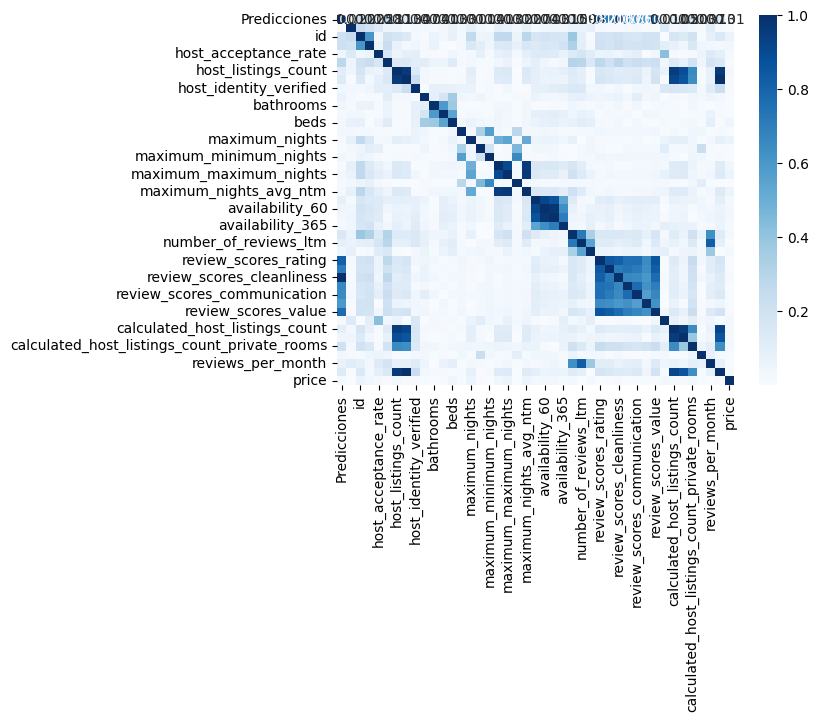

In [85]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [86]:
venecia_private_room5 = pd.read_csv("venecia_private_room1.csv")

In [87]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room5[['instant_bookable']]
Vars_Dep=venecia_private_room5['price']


In [88]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([35.01943299]),
 'rank_': 1,
 'singular_': array([20.23219127]),
 'intercept_': 237.7303206997083}

Modelo matemático:y=35.01943299 * 237.7303206997083

In [89]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0010594239214251067

In [90]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room5[['instant_bookable']])
y_pred

array([237.7303207 , 272.74975369, 237.7303207 , ..., 272.74975369,
       237.7303207 , 272.74975369])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room5.insert(0, 'Predicciones', y_pred)
venecia_private_room5


<Axes: xlabel='instant_bookable', ylabel='price'>

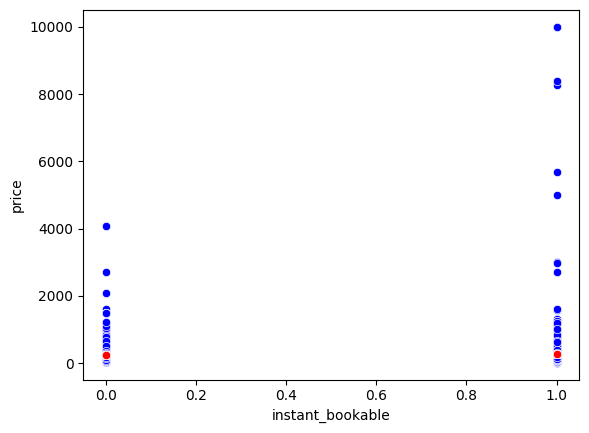

In [92]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=venecia_private_room5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=venecia_private_room5)


In [93]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0010594239214251067

In [94]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.032548792933457714

In [96]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type","property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room5 = venecia_private_room5.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

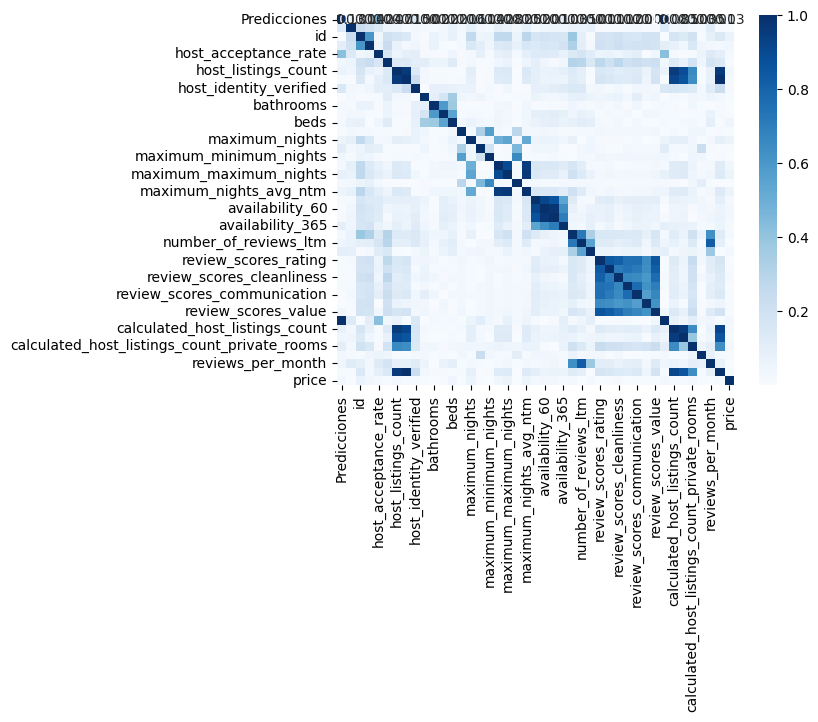

In [100]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [103]:
venecia_private_room6 = pd.read_csv("venecia_private_room1.csv")

In [104]:
venecia_private_room6['property_type'] = venecia_private_room6['property_type'].astype('category').cat.codes


In [105]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_private_room6[['property_type']]
Vars_Dep=venecia_private_room6['price']


In [106]:
# Ver categorías únicas de room_type
venecia_private_room6['property_type'].unique()

array([ 5, 15,  1,  9, 22,  8, 16, 21, 10,  7, 11,  6,  2, 18, 12, 19, 17,
        3, 14,  0, 13,  4, 20], dtype=int8)

In [107]:
venecia_private_room6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1701 non-null   int64  
 1   id                                            1701 non-null   float64
 2   host_id                                       1701 non-null   int64  
 3   host_acceptance_rate                          1701 non-null   float64
 4   host_is_superhost                             1701 non-null   int64  
 5   host_listings_count                           1701 non-null   int64  
 6   host_total_listings_count                     1701 non-null   int64  
 7   host_identity_verified                        1701 non-null   int64  
 8   property_type                                 1701 non-null   int8   
 9   room_type                                     1701 non-null   o

In [108]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.80862967]),
 'rank_': 1,
 'singular_': array([273.72735827]),
 'intercept_': 279.99531483105653}

Modelo matemático:y=-1.80862967 * 279.99531483105653

In [109]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0005172511034744476

In [110]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_private_room6[['property_type']])
y_pred

array([270.95216647, 252.86586974, 252.86586974, ..., 274.56942581,
       252.86586974, 252.86586974])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_private_room6.insert(0, 'Predicciones', y_pred)
venecia_private_room6


<Axes: xlabel='property_type', ylabel='price'>

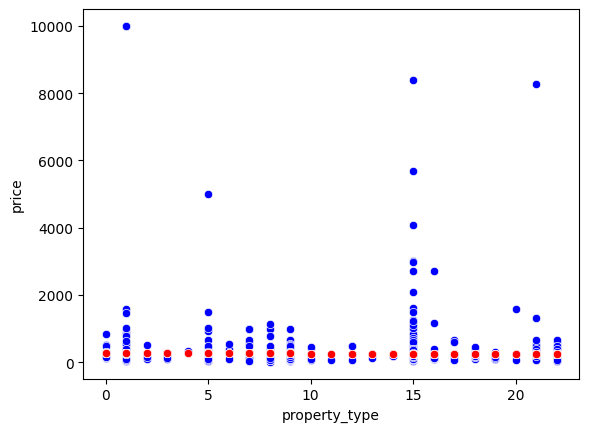

In [112]:
sns.scatterplot(x='property_type', y='price', color="blue", data=venecia_private_room6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=venecia_private_room6)

In [113]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0005172511034744476

In [114]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.022743155090585995

In [116]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
    "room_type"#"property_type",
]

# Eliminar columnas del DataFrame
venecia_private_room6 = venecia_private_room6.drop(columns=columnas_a_eliminar)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_private_room6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

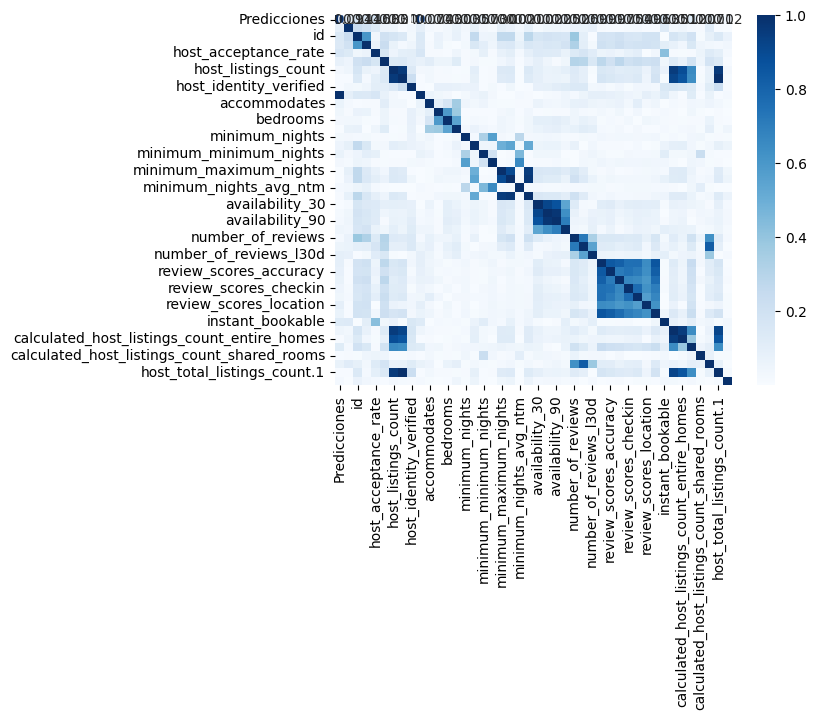

In [119]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map